<a href="https://www.kaggle.com/code/iamarunkumar/6-decision-tree-regression?scriptVersionId=178332367" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Decision Tree Intuition

**CART - the term stands for Classification and regression trees**. This is an umbrella term that encompasses two types of decision trees. they are classification trees and regression trees. Also, regression tress are bit more complex than decision trees.

We will understand the concept through an illustration. We have a scatted plot which represents our dataset (refer below diagram for plot). Here, we have two independent variables X1 & X2 and we are predicting is the third variable (a dependent variable-y). We cannot see y, because it's simply a 2-d chart and y is the third dimension and this is just the projection of all points on X1 & X2 plane.

Here, we are using 2 independent variables for our work (some explanations have only one independent variable which is not robust) to predict the dependent variable since that's the robust way to do.

Now, once we run the regression tree or decision tree algorithm, in sense of regression, the scatterplot will be split into segments and let's see how an algorithm could do that. Let's assume in chart, the algorithm creates a split(**split 1**) somewhere on 20 on X1. Now, the scatterplot will be split into two parts. everything less than 20 and the other greater than 20 on X1. Then another split (**split 2**)on 170 on X2 intersecting X1. Elements in this side will be intersecting X1 and compared lesser/greater than 170. Then another split (**split 3**) somewhere on 200 on X2 from margin. Elements would be compared lesser/greater than 200. Final split (**split 4**) on 40 on X1 intersecting split 2.

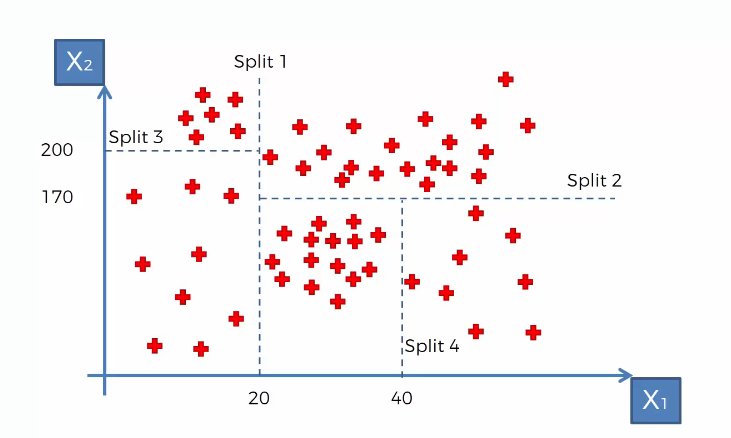

**Now how and where these splits are conducted is determined by algorithm** It involves looking something called **information entropy** which is mathematical concept and quite complex. Basically, when we split, is this split increasing the amount of information about our points or adding value to the way we want to group our points. The algorithm knows when to stop is when there is certain minimum for the information that needs to be added or like it cannot add any more information to split the **leaves**. Each split is called **leaves**.

The main aim of the algorithm is to find the optimal splits of our dataset into leaves and the final leaves is called **terminal leaves**. Let's start **creating our decision tree**.

First split happens on X1 on 20. So, first decision is **X1<20 with Yes and No**. we have 2 empty boxes on (Yes & No)

Second split happens on X2 on 170 **but on only greater than 20**. So,**the decision here falls on No branch of split1** because the value of split2 > 20. So, we have filled the empty box of No in split1.

Third split happens on 200 on X2 and checks if X2<200?. Since, this split falls on X1<20, it fills the empty box of Yes on split1.

Fourth split happens on 40 on X1 and checks if X1<40?. Since, this split falls on X1<170, it fills the empty box of yes of split2.

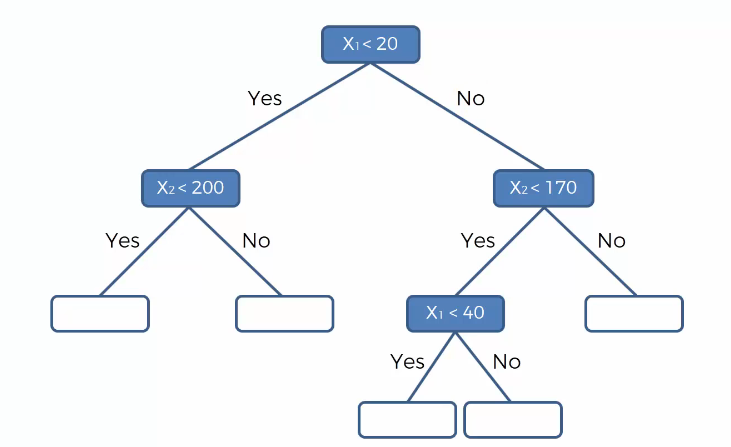

Now, how does the algorithm predicts the values of each of those empty boxes left. means, how does the algorithm predicts the value of y (dependent variable). Suppose in future a value called X1 on 30 and X2 on 50 is given as a split. Now the question, how does the algorithm predicts y (dep.variable) for that value or split.

**Answer** It's so simple that the algorithm **takes average** of all those values from each split or terminal leaf which is the **y value** and that's assigned to the new value that falls in the split or terminal leaf.

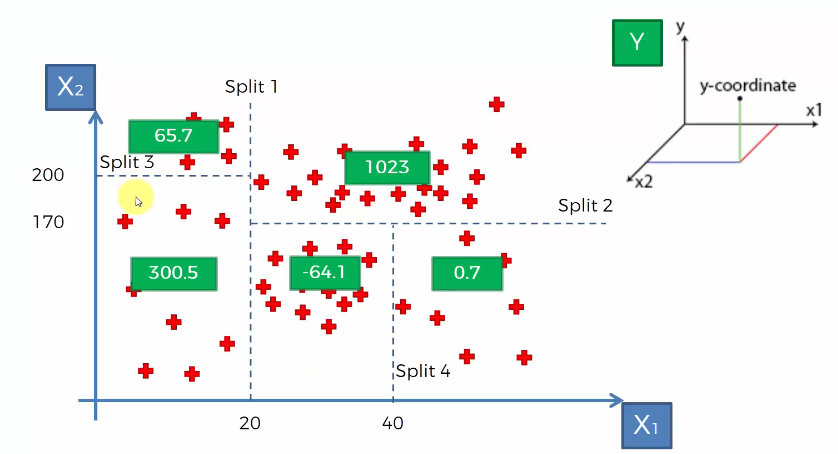

Finally, the main advantage of decision tree is to accurately predict the value of dependent variable by splitting the segments. Instead of finding the average of all data points in a chart, decision tree regression will split the chart into segments and for **splitting we need at least 5% of data in the split. If less than 5% the algorithm automatically stops splitting the dataset**. Finding the new value and assigning the average in that particular location is the advantage of decision tree regression algorithm.

**In decision tree regression we won't apply feature scaling** because the predictions from decision tree regression and random forest regression are resulting from the successive split of data or from each node of the tree and therefore there are not some equation for dependent variables unlike other models. Although the values of features and dependent variable vectors differs huge, the model perfom well with the values of original scales.

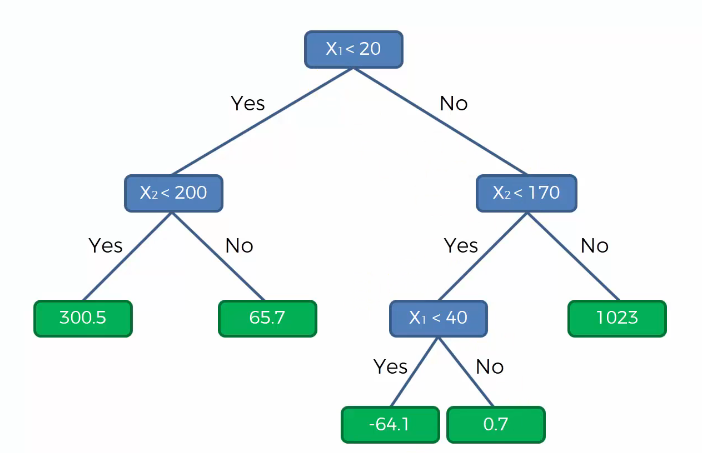

# Importing the libraries

In [ ]:
# Let's import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing datasets

In [ ]:
# Let's import the dateset

df = pd.read_csv('/kaggle/input/salary-of-positions/Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

# Predicting the decision tree regression in the model

In [ ]:
"""Let's import the DecisionTreeRegressor() class from tree module of sklearn library
Be cautious while importing since we have another class called DecisionTreeClassifier() that is in Classification section 
used for predicting the Categorical values."""

from sklearn.tree import DecisionTreeRegressor

"""We won't pass any parameter here except random state=0 since we fix the seed here which will allow us to get the same
result at the end. Indeed, there are some random factors happening when we build and train the model."""

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

# Predicting the new result

In [ ]:
"""This is now a very simple step of predicting the straight value. We pass the value 6.5 straight to predict() method.
We don't need to do feature scaling or inverser_transform for our data. Remember, we need to pass value in 2D array,
which means in double pair of square brackets"""

regressor.predict([[6.5]])

"""Here the prediction (150+k) is very bad result since we trained only in one feature. decision tree regression will
work well only on data with multiple features"""

# Visualizing the decision tree regression (result) in higher resolution

In [ ]:
"""As usual, simply copy the entire code from polynomial regression of higher resolution section and modify below
changes. Remove the lin_reg_2 variable and replace it to regressor. Remove the fit_transform() as we don't need that
here."""

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

"""As already informed, decision tree regressor won't work well for 2D(one feature and one dep.variable vector) data"""